In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

#imports
import numpy as np 
import matplotlib.pyplot as plt


#functions
def logistic(x):
   """use of logistic funiction"""
   return 1.0/(1.0 + np.exp(-x))
  
def tanhyperbolic(x):
    """use of tanhyperbolic function"""
    return np.tanh(x)

def error_reg(data,weight):
    """return original and predicted"""
    temp_error = []
    for i in range(data.shape[0]):
        temp = np.dot(data[i,:-1],weight)
        temp_error.append(temp)
    return np.array(temp_error)

def datadivide(Class):
    """divide the data into test,train,valid"""
    np.random.shuffle(Class)
    train = Class[:int(0.6*Class.shape[0])]
    test  = Class[int(0.6*Class.shape[0]):]
    return train,test

def predict_logistic(data,weight1,weight2,weight3):
    a = np.dot(data,weight1)
    if logistic(a)>0.5:
        a = 1
    else:
        a = 0
    b = np.dot(data,weight2)
    if logistic(b)>0.5:
        b = 1
    else:
        b = 0
    c = np.dot(data,weight3)
    if logistic(c)>0.5:
        c = 1
    else:
        c = 0
    final = np.argmax(np.array([a,b,c]))
    return final

def predict_tan(data,weight1,weight2,weight3):
    a = np.dot(data,weight1)
    if tanhyperbolic(a)>0:
        a = 1
    else:
        a = 0
    b = np.dot(data,weight2)
    if tanhyperbolic(b)>0:
        b = 1
    else:
        b = 0
    c = np.dot(data,weight3)
    if tanhyperbolic(c)>0:
        c = 1
    else:
        c = 0
    final = np.argmax(np.array([a,b,c]))
    return final
     

def plot_decision_boundry(dataset,labels,weight1,weight2,weight3,method="Linear-logistic"):
    h = 0.04
    x_min, x_max = dataset[:,1].min() - 100*h, dataset[:,1].max() + 100*h
    y_min, y_max = dataset[:,2].min() - 100*h, dataset[:,2].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = np.c_[xx.ravel(), yy.ravel()]
    classify = np.zeros(Z.shape[0])
    if method =="Linear-logistic" or  method =="NonLinear-Logistic":
        for i in range(Z.shape[0]):
            t = np.append([1],Z[i])
            classify[i] = predict_logistic(t,weight1,weight2,weight3) 
    else:
       for i in range(Z.shape[0]):
           t = np.append([1],Z[i])
           classify[i] = predict_tan(t,weight1,weight2,weight3)
    Z = classify.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.contourf(xx, yy, Z,alpha=0.5,cmap='bwr')
    # add a legend, called a color bar
    plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
    plt.scatter(dataset[:,1], dataset[:,2],c=labels,cmap='brg')
    plt.title(f'Decision_boundary-{method}') 
    plt.show()   


def perceptron(Class1,Class2,epoch,ita=0.01,method="logistic",):
    weight = np.random.rand(3)
    data = np.concatenate((Class1,Class2), axis=0)
    error = []
    for i in range(epoch):
        Sum = 0
        for j in range(data.shape[0]):
              a = np.dot(data[j,:-1],weight)
              if method=="logistic":
                  sigmoid = logistic(a)
                  E = 0.5*(data[j,-1]- sigmoid)**2     #error
                  delta = data[j,-1]-sigmoid         #delta
                  diff = sigmoid*(1-sigmoid)   #differntiation
                  weight_instant = ita*delta*diff*diff*data[j,:-1]
                  weight += weight_instant
              else:
                  fun = tanhyperbolic(a)
                  E = 0.5*(data[j,-1]-fun)**2
                  delta = data[j,-1]-fun        #delta
                  diff = (1-fun**2)             #differntiation
                  weight_instant = ita*delta*diff*data[j,:-1]
                  weight += weight_instant
              Sum += E
        error.append((0.5*Sum)/data.shape[0])

    return weight,np.array(error)

def perceptron_regression(data,dim,epoch,ita=0.01):
    weight = np.random.rand(dim)
    error = []
    MSE = []
    for i in range(epoch):
        Sum = 0
        Sum2 = 0
        for j in range(data.shape[0]):
            a = np.dot(data[j,:-1],weight)
            E = 0.5*(data[j,-1]- a)**2     #error
            MSE_e = (a-data[j,-1])**2 
            weight_instant = ita*(data[j,-1]- a)*data[j,:-1]
            weight += weight_instant
            Sum += E
            Sum2 +=MSE_e
        error.append((0.5*Sum)/data.shape[0])
        MSE.append(Sum2/data.shape[0])
    return weight,np.array(error),np.array(MSE)

def model(Class1,Class2,Class3,epoch,ita=0.1,method="logistic"):
        if method =="logistic":
            zero1 = np.zeros((Class1.shape[0],1),dtype=int)
            zero2 = np.zeros((Class2.shape[0],1),dtype=int)
            zero3 = np.zeros((Class3.shape[0],1),dtype=int)
        else :
            zero1 = np.zeros((Class1.shape[0],1),dtype=int)
            zero2 = np.zeros((Class2.shape[0],1),dtype=int)
            zero3 = np.zeros((Class3.shape[0],1),dtype=int)
            zero1 -= 1
            zero2 -= 1
            zero3 -= 1

        ones1 = np.ones((Class1.shape[0],1),dtype=int)
        ones2 = np.ones((Class2.shape[0],1),dtype=int)
        ones3 = np.ones((Class3.shape[0],1),dtype=int)
        data1 = np.append(Class1,ones1,axis=1)
        data2 = np.append(Class2,zero2,axis=1)
        data3 = np.append(Class3,zero3,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X1_weight,X1_Error = perceptron(data1,alldata,epoch,ita,method)
        data1 = np.append(Class2,ones2,axis=1)
        data2 = np.append(Class3,zero3,axis=1)
        data3 = np.append(Class1,zero1,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X2_weight,X2_Error = perceptron(data1,alldata,epoch,ita,method)
        data1 = np.append(Class3,ones3,axis=1)
        data2 = np.append(Class2,zero2,axis=1)
        data3 = np.append(Class1,zero1,axis=1)
        alldata = np.concatenate((data2,data3), axis=0)
        X3_weight,X3_Error = perceptron(data1,alldata,epoch,ita,method)
        return X1_weight,X2_weight,X3_weight,X1_Error,X2_Error,X3_Error
    



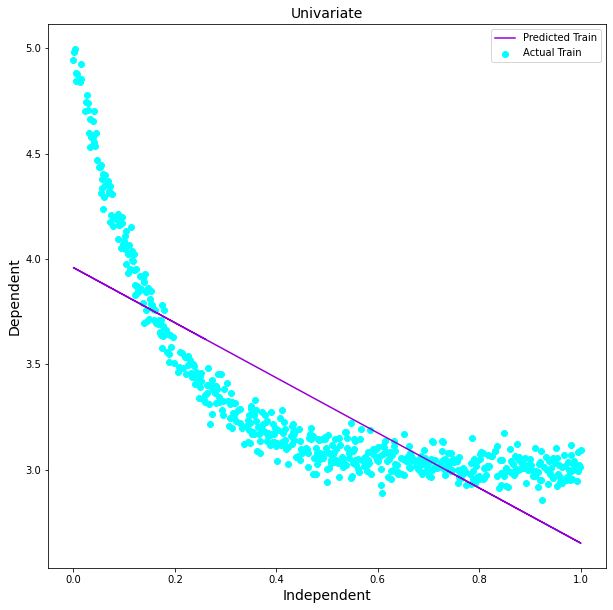

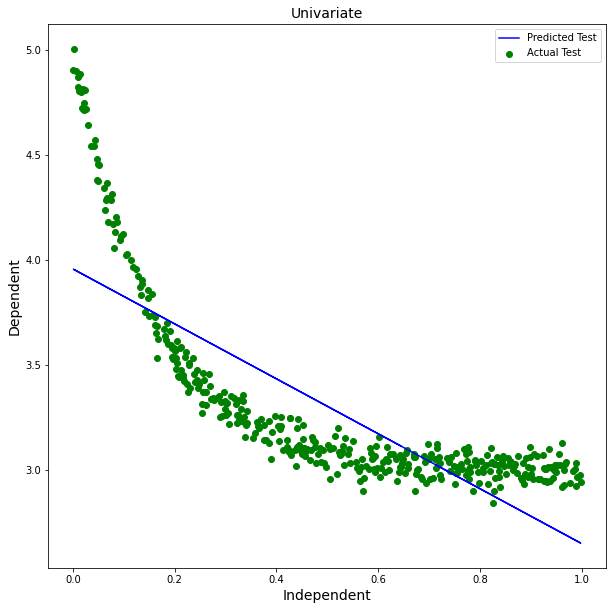

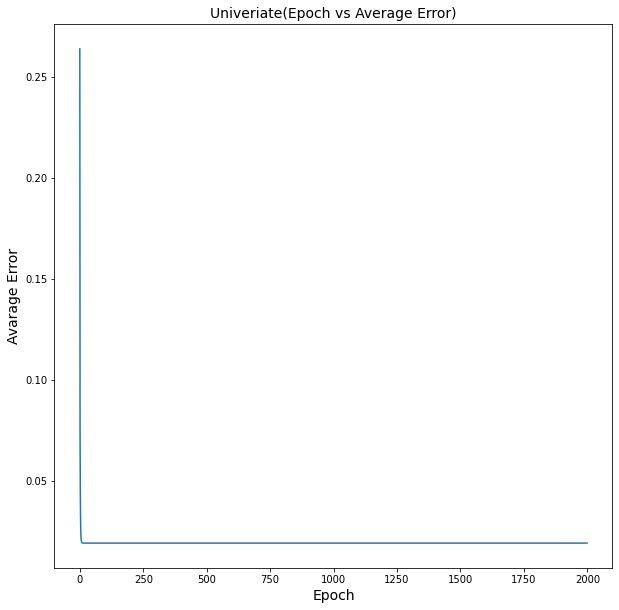

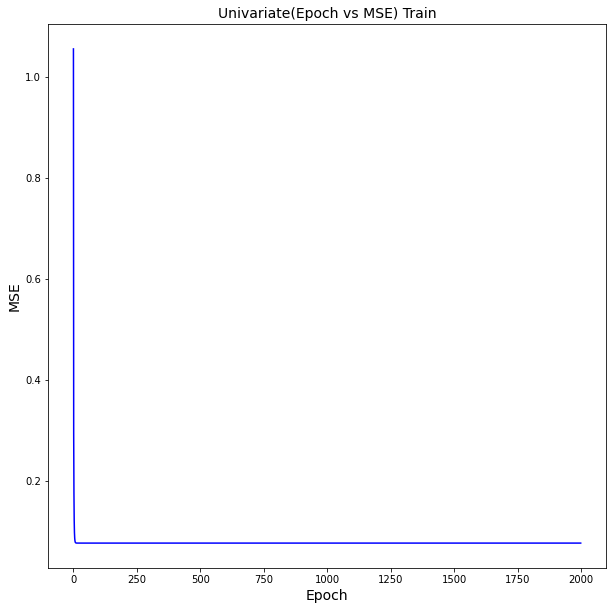

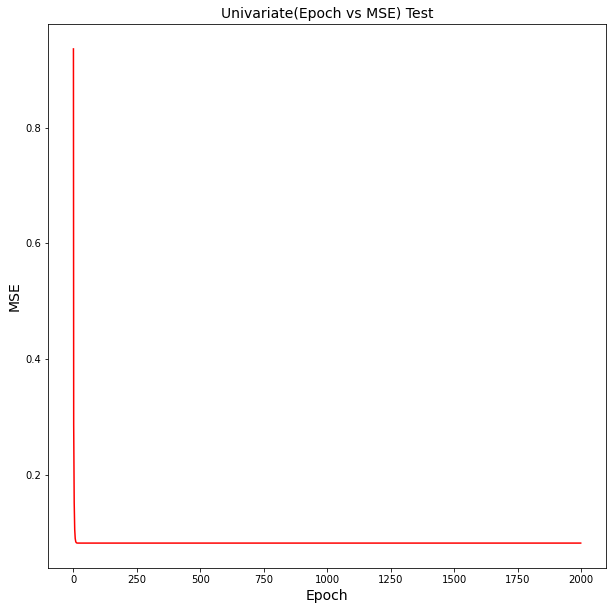

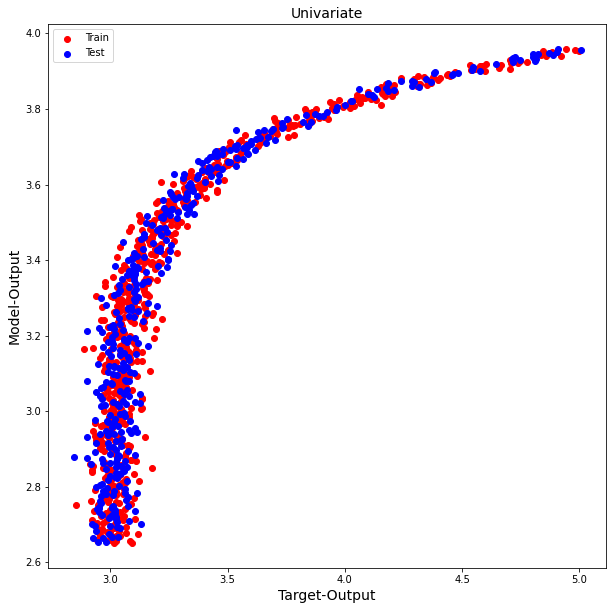

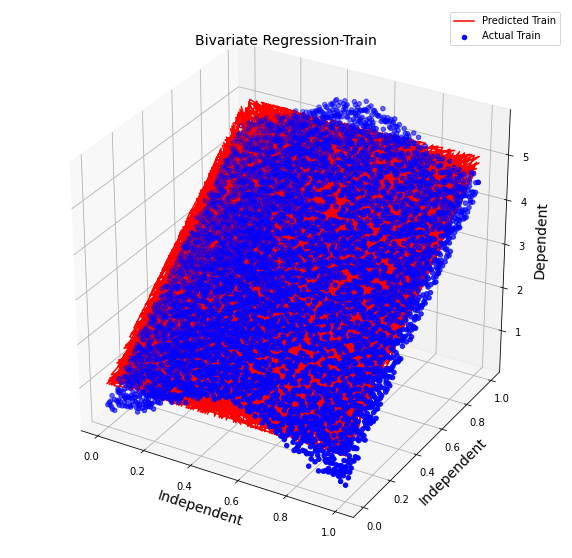

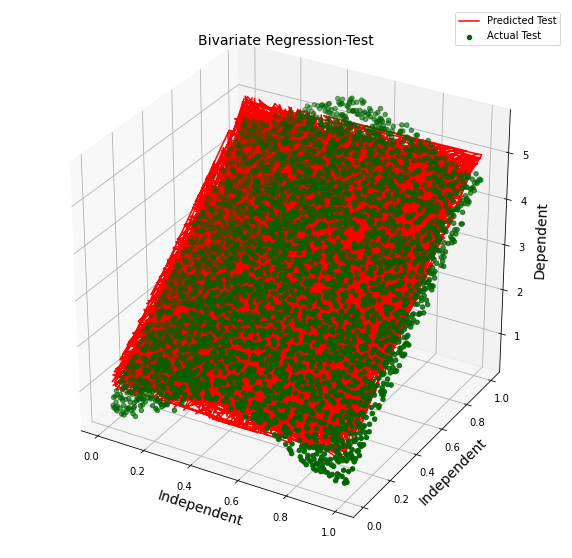

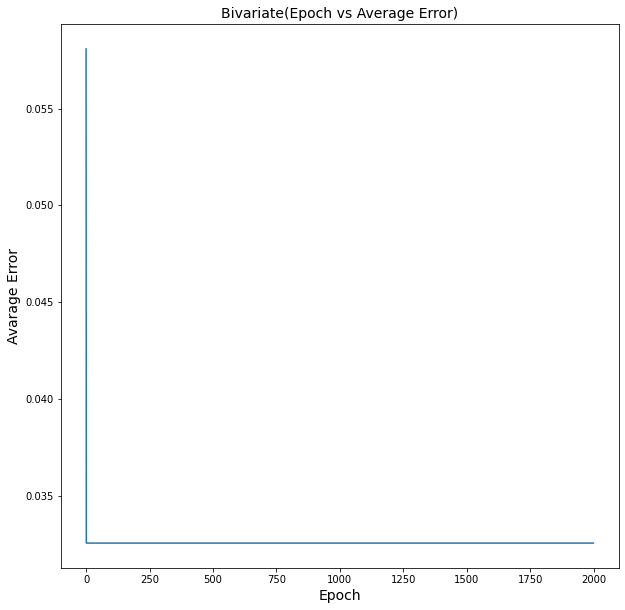

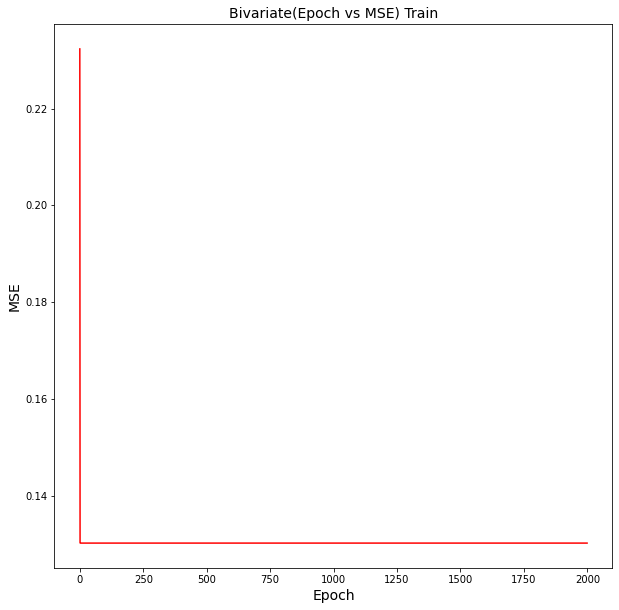

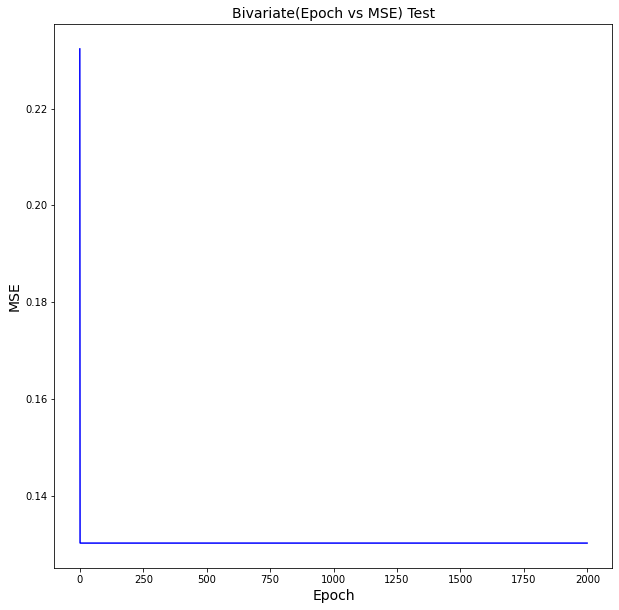

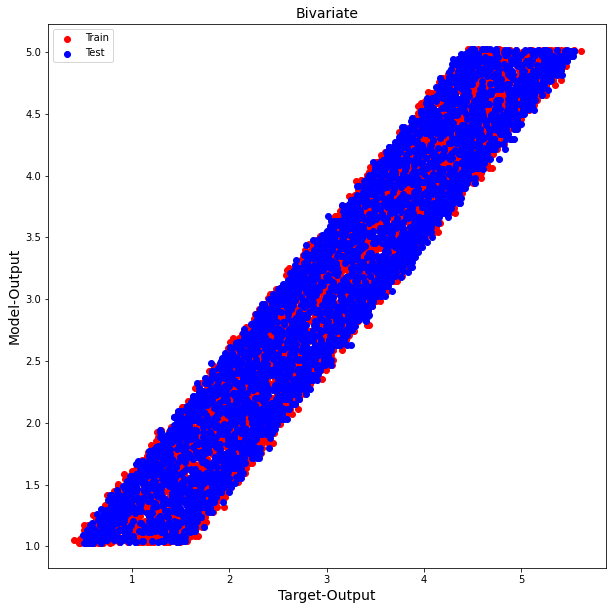

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from Functions import datadivide,perceptron_regression,error_reg

#####################################uni-Variate######################################################
data_uni = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Regression/UnivariateData/32.csv",sep=",",header=None).to_numpy()

#shape of data
shape = data_uni.shape

#epoch
epoch = 2000

#concatinate one to the dataset
one = np.ones((data_uni.shape[0],1),dtype=int)
data_uni = np.append(one,data_uni,axis=1)

#divide the data
train1,test1 = datadivide(data_uni)

#call the perceptron
weight_uni, error_uni,MSE_uni = perceptron_regression(train1,shape[1],epoch,ita=0.01)
weight_uni1, error_uni1,MSE_uni1 = perceptron_regression(test1,shape[1],epoch,ita=0.01)

#predict and mse
train_actual =  error_reg(train1,weight_uni)
test_actual =  error_reg(test1,weight_uni)

#plt
plt.figure(figsize=(10,10))
plt.scatter(train1[:,1],train1[:,2],color='aqua',label="Actual Train")
plt.plot(train1[:,1],train_actual,color ='darkviolet',label="Predicted Train")
plt.legend()
plt.xlabel("Independent",fontsize=14)
plt.ylabel("Dependent",fontsize=14)
plt.title("Univariate",fontsize=14)
plt.show()


plt.figure(figsize=(10,10))
plt.scatter(test1[:,1],test1[:,2],color='g',label="Actual Test")
plt.plot(test1[:,1],test_actual,color ='b',label="Predicted Test")
plt.legend()
plt.xlabel("Independent",fontsize=14)
plt.ylabel("Dependent",fontsize=14)
plt.title("Univariate",fontsize=14)
plt.show()


#plot error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,error_uni)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.title("Univeriate(Epoch vs Average Error)",fontsize=14)
plt.show()

#plot MSE_train
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,MSE_uni,color='b',label="Train")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("MSE",fontsize=14)
plt.title("Univariate(Epoch vs MSE) Train",fontsize=14)
plt.show()
#plot MSE_test
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,MSE_uni1,color='r',label="Test")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("MSE",fontsize=14)
plt.title("Univariate(Epoch vs MSE) Test",fontsize=14)
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(train1[:,-1],train_actual,color='r',label="Train")
plt.scatter(test1[:,-1],test_actual,color='b',label="Test")
plt.legend()
plt.xlabel("Target-Output",fontsize=14)
plt.ylabel("Model-Output",fontsize=14)
plt.title("Univariate",fontsize=14)
plt.show()

############################## Bi-Variate##################################################

data_bi = pd.read_csv(r"/content/drive/MyDrive/Assignment 1 Data/Regression/BivariateData/32.csv",sep=",",header=None).to_numpy()

#shape of data
shape = data_bi.shape

#epoch
epoch = 2000

#concatinate one to the dataset
one = np.ones((data_bi.shape[0],1),dtype=int)
data_bi = np.append(one,data_bi,axis=1)

#divide the data
train2,test2 = datadivide(data_bi)

#call the perceptron
weight_bi2, error_bi2,MSE_bi2 = perceptron_regression(train2,shape[1],epoch,ita=0.01)
weight_bi3, error_bi3,MSE_bi3 = perceptron_regression(test2,shape[1],epoch,ita=0.01)

#predict 
train_actual2 =  error_reg(train2,weight_bi2)
test_actual2 =  error_reg(test2,weight_bi2)

fig = plt.figure(figsize=(10,10)) 
ax = plt.axes(projection ='3d') 
ax.scatter(train2[:,1],train2[:,2],train2[:,3],color='b',label="Actual Train")
ax.plot3D(train2[:,1],train2[:,2],train_actual2,color ='r',label="Predicted Train")
ax.set_xlabel('Independent',fontsize=14)
ax.set_ylabel('Independent',fontsize=14)
ax.set_zlabel('Dependent',fontsize=14)
ax.set_title("Bivariate Regression-Train",fontsize=14)
plt.legend()
plt.show()

fig = plt.figure(figsize=(10,10)) 
ax = plt.axes(projection ='3d') 
ax.scatter(test2[:,1],test2[:,2],test2[:,3],color='darkgreen',label="Actual Test")
ax.plot3D(test2[:,1],test2[:,2],test_actual2,color ='r',label="Predicted Test")
plt.legend()
ax.set_xlabel('Independent',fontsize=14)
ax.set_ylabel('Independent',fontsize=14)
ax.set_zlabel('Dependent',fontsize=14)
ax.set_title("Bivariate Regression-Test",fontsize=14)
plt.legend()
plt.show()



#plot error
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,error_bi2)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("Avarage Error",fontsize=14)
plt.title("Bivariate(Epoch vs Average Error)",fontsize=14)
plt.show()


#plot MSE
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,MSE_bi2,color='r',label="Train")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("MSE",fontsize=14)
plt.title("Bivariate(Epoch vs MSE) Train",fontsize=14)
plt.show()

#plot MSE
X = np.array([i for i in range(epoch)])
plt.figure(figsize=(10,10))
plt.plot(X,MSE_bi2,color='b',label="Test")
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("MSE",fontsize=14)
plt.title("Bivariate(Epoch vs MSE) Test",fontsize=14)
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(train2[:,-1],train_actual2,color='r',label="Train")
plt.scatter(test2[:,-1],test_actual2,color='b',label="Test")
plt.legend()
plt.xlabel("Target-Output",fontsize=14)
plt.ylabel("Model-Output",fontsize=14)
plt.title("Bivariate",fontsize=14)
plt.show()


